<a href="https://colab.research.google.com/github/suniti0804/suniti0804/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart** **Disease** **Prediction**

Heart Disease is one of the major concerns to be dealt with. It is very important to identify it and do the proper treatment.
Machine learning proves to be effective in making decisions and predictions from the large quantity of data produced by the healthcare industry.


Here, various ML models have been applied for classifying whether a person is suffering from Heart Disease or Not. The dataset is taken from [Cleveland Heart Disease dataset from the UCI Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease) and the same is also available at [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).



# 1.Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score, roc_curve

from matplotlib import rcParams
from matplotlib.cm import rainbow

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#2.Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data has been imported successfully

#3.Data Visualizaton

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#to check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

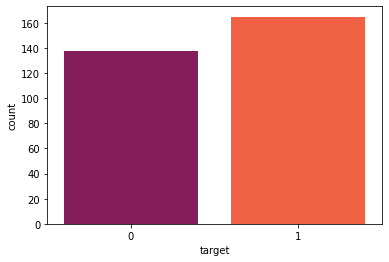

In [9]:
sns.countplot(x = 'target', data = df, palette = 'rocket', saturation = 1)
plt.show()

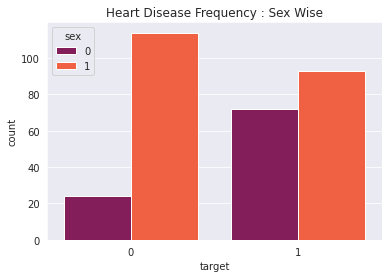

In [10]:
#sex wise distribuion of categorical value
sns.set_style('darkgrid')
sns.countplot(x = 'target', hue = 'sex', data = df, palette = 'rocket', saturation = 1)
plt.title('Heart Disease Frequency : Sex Wise')
plt.show()


In [11]:
#It's always a good practice to work with the dataset where the target classes are of approximately equal size. Thus check for the same

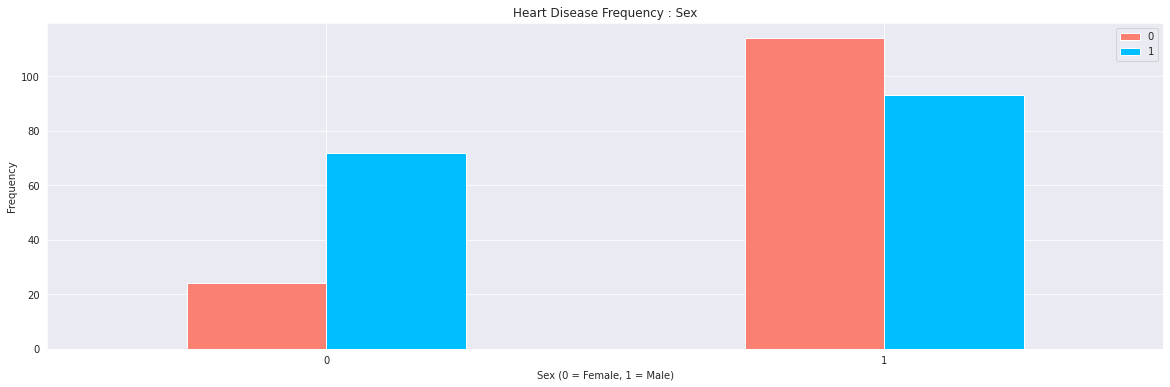

In [12]:
#heart disease frequency according to sex
pd.crosstab(df.sex, df.target).plot(kind = "bar",figsize = (20, 6), color = ['salmon', 'deepskyblue'])
plt.title('Heart Disease Frequency : Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["0", "1"])
plt.ylabel('Frequency')
plt.show()

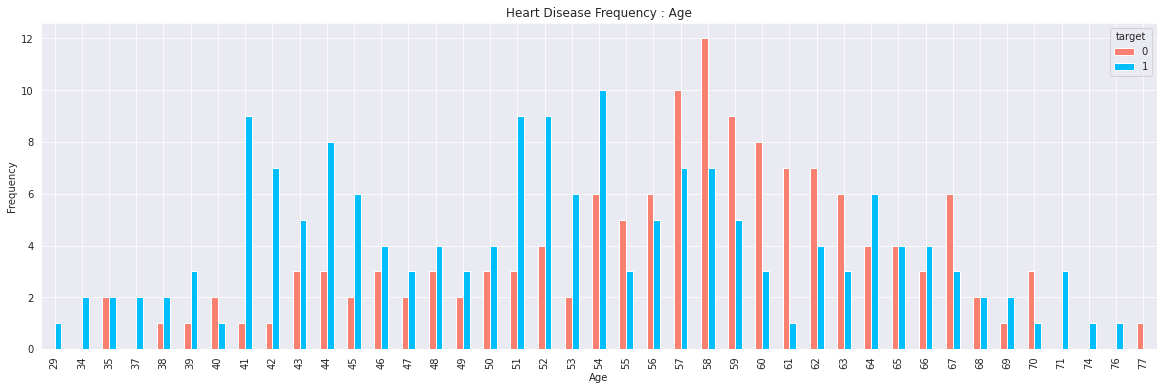

In [13]:
#heart disease frequency according to age
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6), color = ['salmon', 'deepskyblue'])
plt.title('Heart Disease Frequency : Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


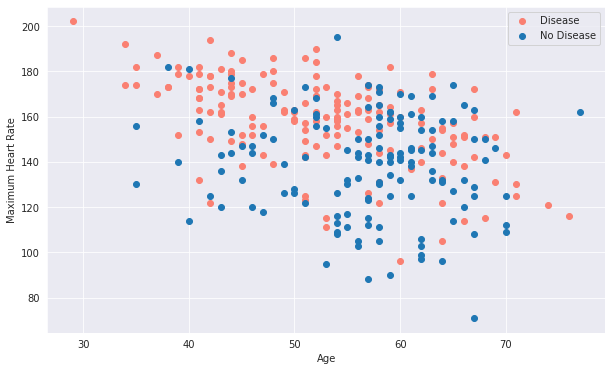

In [14]:
#heart disease frequency according to Maximum Heart Rate and Age
plt.figure(figsize=(10, 6))
plt.scatter(x = df.age[df.target==1], y = df.thalach[(df.target==1)], c = "salmon")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

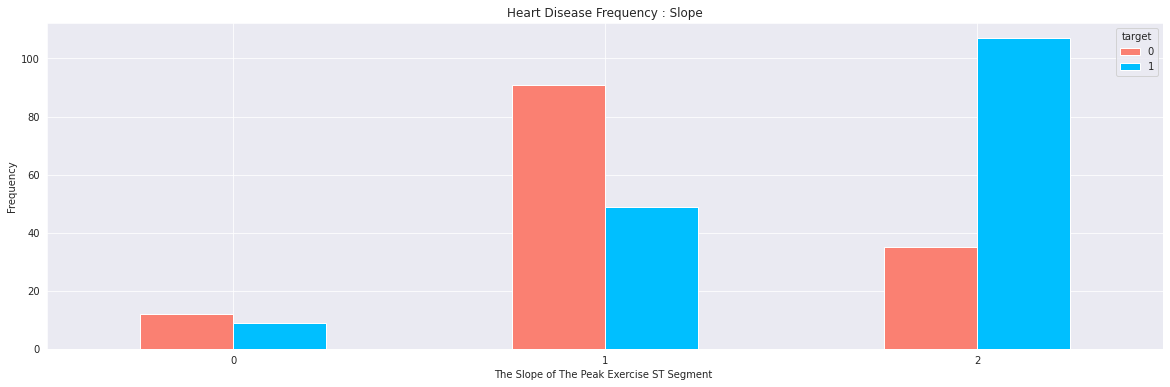

In [15]:
#heart disease frequency according to slope
pd.crosstab(df.slope, df.target).plot(kind="bar",figsize=(20, 6),color=['salmon', 'deepskyblue'])
plt.title('Heart Disease Frequency : Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


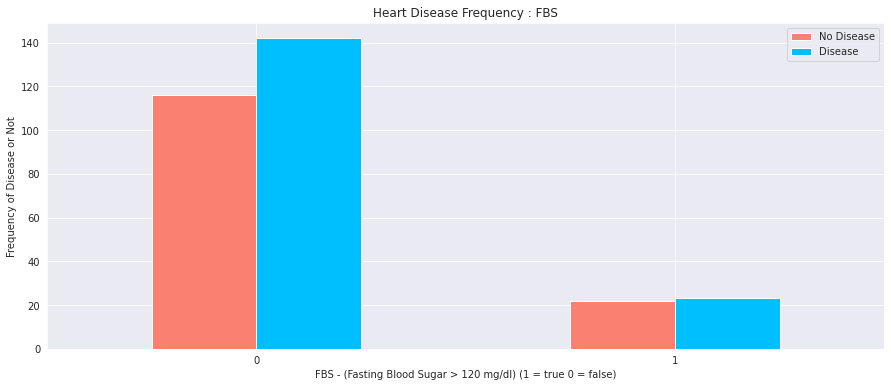

In [16]:
#heart disease frequency according to FBS
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['salmon','deepskyblue' ])
plt.title('Heart Disease Frequency : FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

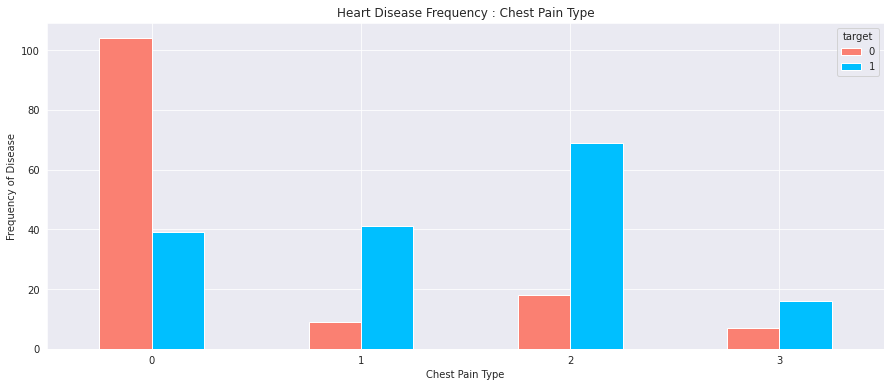

In [17]:
#heart disease frequency according to Chest Pain Type
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['salmon','deepskyblue' ])
plt.title('Heart Disease Frequency : Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease')
plt.show()

#4.Feature Selection

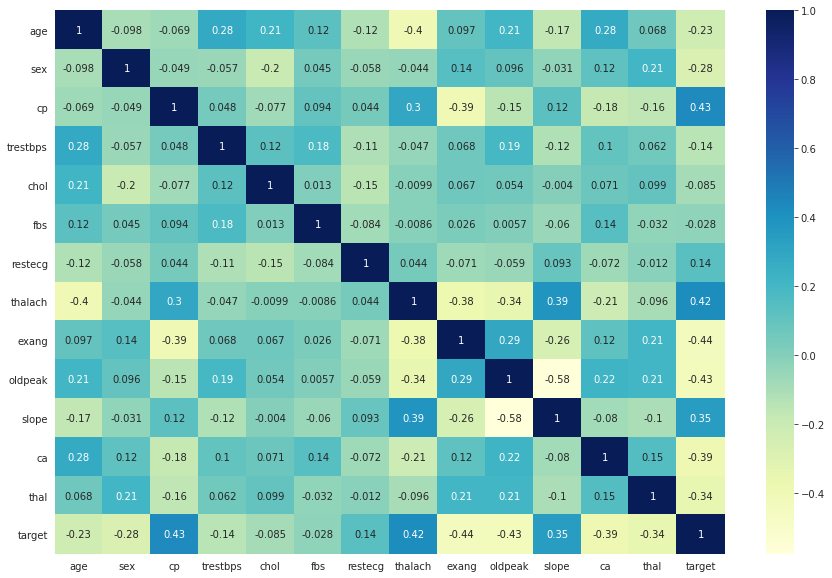

In [18]:
#correlations study
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf5ef738d0>,
      dtype=object)

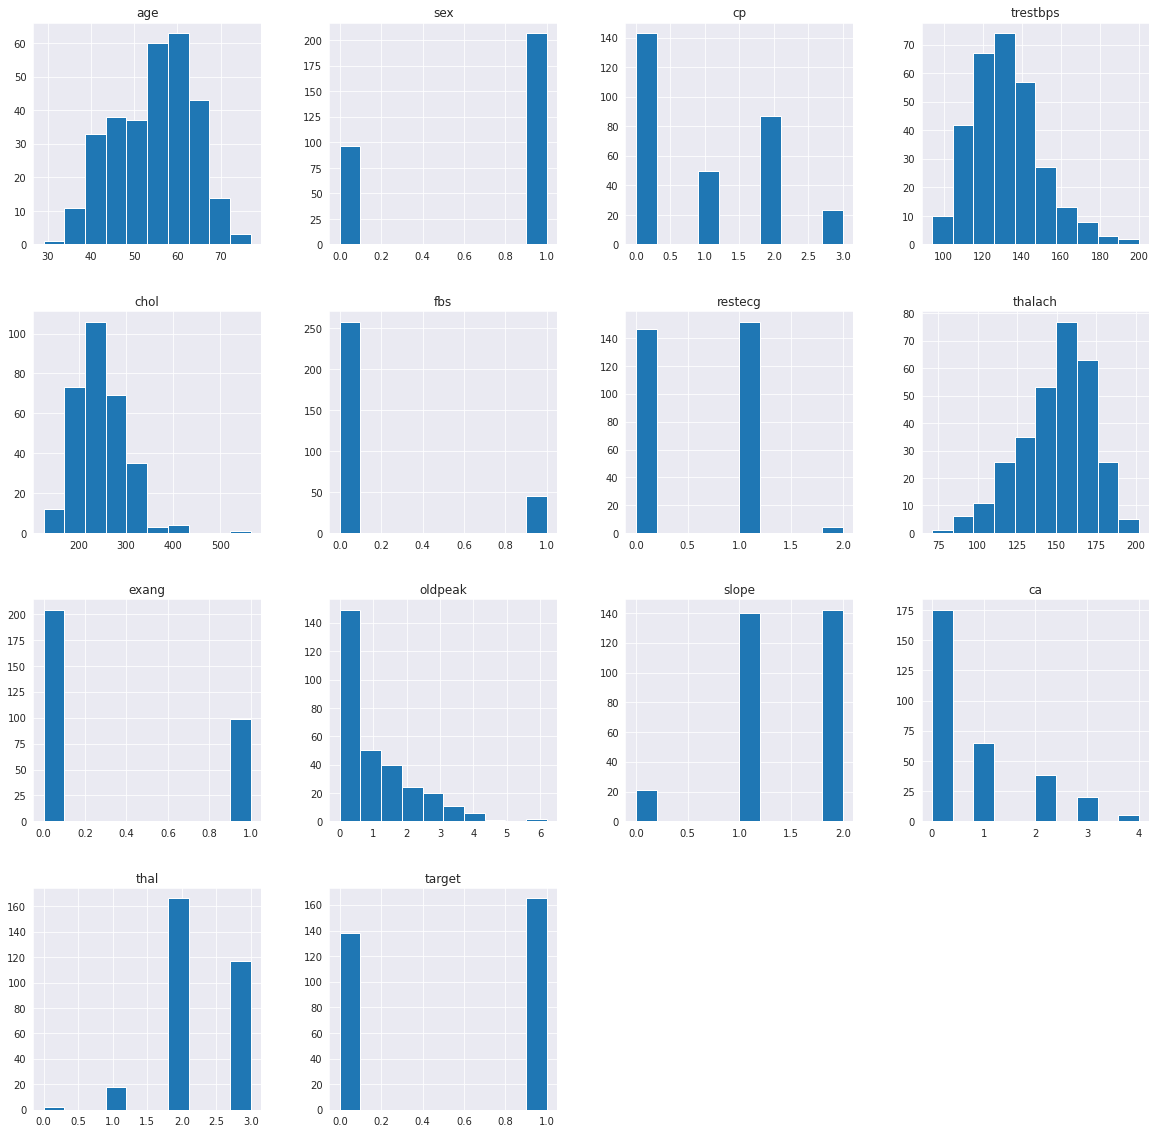

In [19]:
df.hist(figsize = (20, 20))

#5.Data Processing and Train Test Split

In [20]:
#Since 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' are categorical variables we'll turn them into dummy variables.

In [21]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [22]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [23]:
df.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [24]:
#Split Data
Y = df['target']
X = df.drop(['target'], axis = 1)

In [25]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [26]:
#train test split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) 

Now the data is ready to be processed.

5 Different Models are used.

1.   Logistic Regression
2.   K Nearest Neighbors
3.   Decision Tree Classifier
4.   Random Forest Classifier
5.   Support Vector Machine


For all these 5 models, following data are evaluated : 

*   Accuracy Score
*   Classification Report
*   Confusion Matrix
  







#6.Models

Function Definition to evaluate Accuracy Score, Classification Report and Confusion Matrix of Classifier

In [27]:
#function to print accuracy score, classification report and confusion matrix
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    #training performance
    if train:
        pred = clf.predict(X_train)
        print("TRAIN RESULT \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, pred)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, pred)))
        #print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, pred)))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("_______________________________________________________________________________________")

    #test performance    
    elif train==False:
        print("\nTEST RESULT \n")        
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix of Test Data Set: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [28]:
#function to plot confusion matrix
def plot_cm(y_test, model):
  cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
  class_names = [0,1]
  fig,ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks,class_names)
  plt.yticks(tick_marks,class_names)
  #create a heat map
  sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
            fmt = 'g')
  ax.xaxis.set_label_position('top')
  plt.tight_layout()
  plt.title('Confusion Matrix ', y = 1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

##6.1 Logistic Regression

In [29]:
accuracy = {}

TRAIN RESULT 

Accuracy Score: 0.8760

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       109
           1       0.87      0.91      0.89       133

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242


Average Accuracy: 	 0.8552
Accuracy SD: 		 0.0654
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.8852

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix of Test Data Set: 
 [[26  3]
 [ 4 28]]



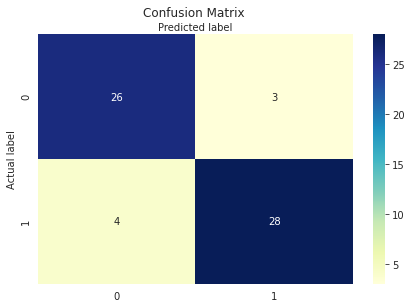

In [30]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_test, train=True)
print_score(lr, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, lr.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr.predict(X_train)) * 100

accuracy['Logistic Regression'] = test_score

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
plot_cm(y_test, lr)

##6.2 KNN

TRAIN RESULT 

Accuracy Score: 0.8760

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       109
           1       0.88      0.90      0.89       133

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242


Average Accuracy: 	 0.8182
Accuracy SD: 		 0.0618
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.9016

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix of Test Data Set: 
 [[26  3]
 [ 3 29]]



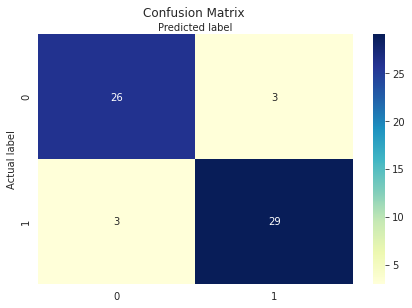

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn.predict(X_train)) * 100

accuracy['KNN'] = test_score


results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
plot_cm(y_test, knn)

##6.3 Decision Tree Classifier

TRAIN RESULT 

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242


Average Accuracy: 	 0.7605
Accuracy SD: 		 0.0436
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.8525

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix of Test Data Set: 
 [[25  4]
 [ 5 27]]



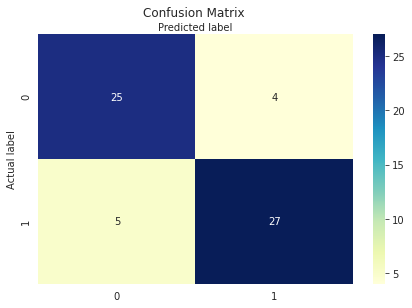

In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print_score(dtc, X_train, y_train, X_test, y_test, train=True)
print_score(dtc, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, dtc.predict(X_test)) * 100
train_score = accuracy_score(y_train, dtc.predict(X_train)) * 100

accuracy['Decision Tree Classifier'] = test_score


results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
plot_cm(y_test, dtc)

##6.4 Random Forest Classifier

TRAIN RESULT 

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242


Average Accuracy: 	 0.8182
Accuracy SD: 		 0.0610
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.8525

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix of Test Data Set: 
 [[25  4]
 [ 5 27]]



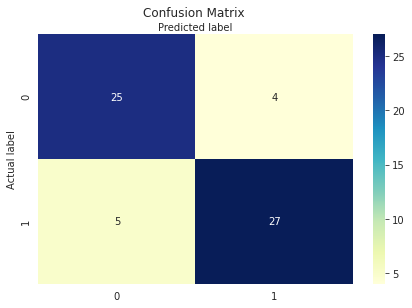

In [33]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, rf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf.predict(X_train)) * 100

accuracy['Random Forest Classifier'] = test_score

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
plot_cm(y_test, rf)

##6.5 Support Vector Machine

TRAIN RESULT 

Accuracy Score: 0.9256

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       109
           1       0.92      0.95      0.93       133

    accuracy                           0.93       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.93      0.93      0.93       242


Average Accuracy: 	 0.8302
Accuracy SD: 		 0.0636
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.9016

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix of Test Data Set: 
 [[27  2]
 [ 4 28]]



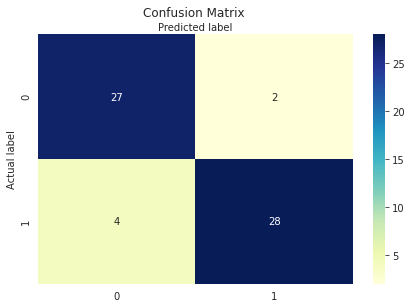

In [34]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)

print_score(svm, X_train, y_train, X_test, y_test, train = True)
print_score(svm, X_train, y_train, X_test, y_test, train = False)

test_score = accuracy_score(y_test, svm.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm.predict(X_train)) * 100

accuracy['SVM'] = test_score

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
plot_cm(y_test, svm)

## Accuracy comparison between Different Models

In [35]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.603306,88.524590
1,K-nearest neighbors,87.603306,90.163934
2,Decision Tree Classifier,100.000000,85.245902
3,Random Forest Classifier,100.000000,85.245902
4,Support Vector Machine,92.561983,90.163934


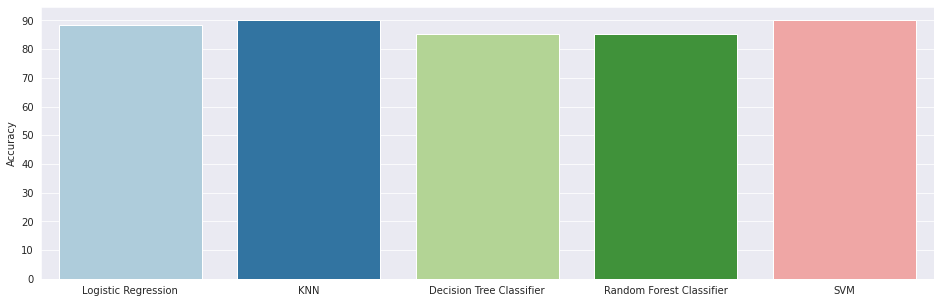

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
sns.barplot(x = list(accuracy.keys()), y = list(accuracy.values()), palette = 'Paired')
plt.show()

As seen from the table and graph, the highest accuracy is produced by KNN and SVM. 

The accuracy can be improved by Hyperparameter Tuning. It involves choosing a range of optimal parameters for an algorithm. 

#7.Hyperparameter Tuning To Improve The Accuracy

In [37]:
accuracy_tuned = {}

##7.1 Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


TRAIN RESULT 

Accuracy Score: 0.8554

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       109
           1       0.85      0.89      0.87       133

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242


Average Accuracy: 	 0.8430
Accuracy SD: 		 0.0663
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.9016

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix of Test Data Set: 
 [[27  2]
 [ 4 28]]



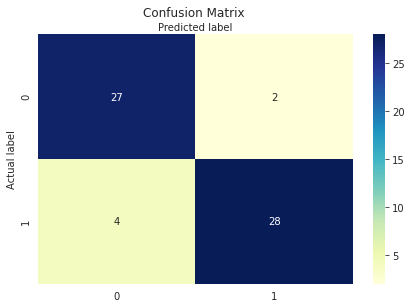

In [38]:
params = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
lr = LogisticRegression()

lr_cv = GridSearchCV(lr, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
#print(f"Best parameters: {best_params}")
lr = LogisticRegression(**best_params)

lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_test, train=True)
print_score(lr, X_train, y_train, X_test, y_test, train=False)


test_score = accuracy_score(y_test, lr.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr.predict(X_train)) * 100

accuracy_tuned['Logistic Regression'] = test_score

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#tuning_results_df
plot_cm(y_test, lr)

##7.2 KNN

In [39]:
train_score = []
test_score = []
neighbors = range(1, 31)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 91.80%


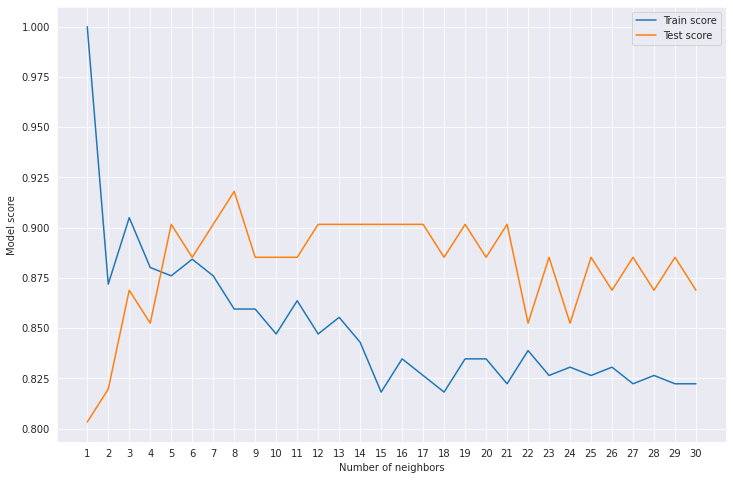

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

TRAIN RESULT 

Accuracy Score: 0.8223

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.79       109
           1       0.80      0.90      0.85       133

    accuracy                           0.82       242
   macro avg       0.83      0.81      0.82       242
weighted avg       0.83      0.82      0.82       242


Average Accuracy: 	 0.8135
Accuracy SD: 		 0.0758
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.8852

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix of Test Data Set: 
 [[26  3]
 [ 4 28]]



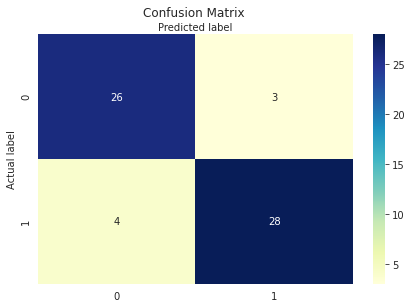

In [41]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn.predict(X_train)) * 100

accuracy_tuned['KNN'] = test_score

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
#tuning_results_df
plot_cm(y_test, knn)

##7.3 Decision Tree Classifier

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   41.5s finished


Best_params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'random'}
TRAIN RESULT 

Accuracy Score: 0.8471

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       109
           1       0.83      0.91      0.87       133

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242


Average Accuracy: 	 0.8308
Accuracy SD: 		 0.0591
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.8689

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted a

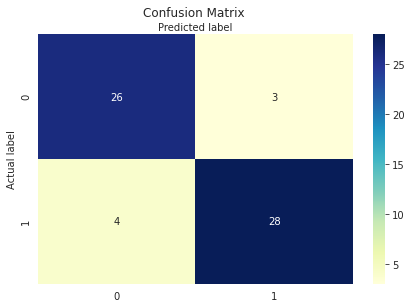

In [42]:
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1, 20))}

tree = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree = DecisionTreeClassifier(**best_params)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

accuracy_tuned['Desision Tree Classifier'] = test_score

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
#tuning_results_df
plot_cm(y_test, knn)


##7.4 Random Forest Classifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


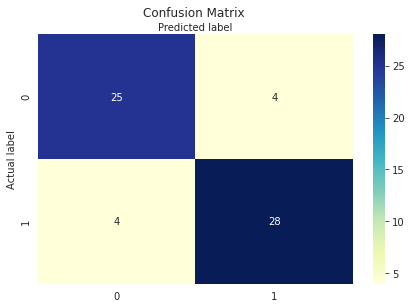

In [43]:
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 'max_depth': [None, 3, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2), 'min_samples_leaf': np.arange(1, 20, 2)}
np.random.seed(42)

rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv=5, n_iter=20, verbose=True)

rf.fit(X_train, y_train)
rf.best_params_

test_score = accuracy_score(y_test, rf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf.predict(X_train)) * 100

accuracy_tuned['Random Forest Classifier'] = test_score

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
#tuning_results_df
plot_cm(y_test, rf)

##7.5 Support Vector Machine

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    4.0s finished


Best params: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
TRAIN RESULT 

Accuracy Score: 0.9421

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       109
           1       0.92      0.98      0.95       133

    accuracy                           0.94       242
   macro avg       0.95      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242


Average Accuracy: 	 0.8303
Accuracy SD: 		 0.0542
_______________________________________________________________________________________

TEST RESULT 

Accuracy Score: 0.8689

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Confusion Matrix of Test 

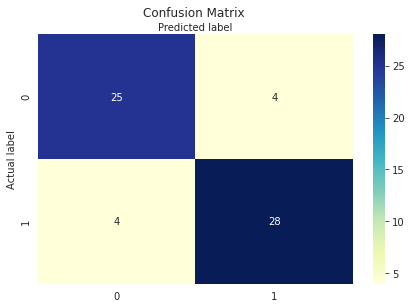

In [44]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm = SVC(**best_params)
svm.fit(X_train, y_train)

print_score(svm, X_train, y_train, X_test, y_test, train=True)
print_score(svm, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, svm.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm.predict(X_train)) * 100

accuracy_tuned['SVM'] = test_score

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
plot_cm(y_test, svm)

##Accuracy comparison between different tuned models

In [45]:
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.537190,90.163934
1,Tuned K-nearest neighbors,82.231405,88.524590
2,Tuned Decision Tree Classifier,84.710744,86.885246
3,Tuned Random Forest Classifier,85.537190,86.885246
4,Tuned Support Vector Machine,94.214876,86.885246


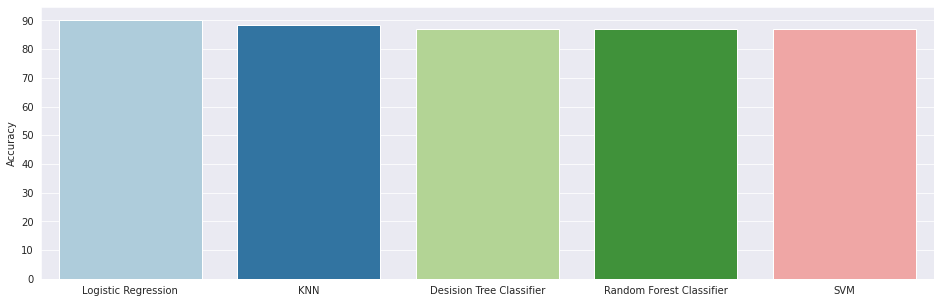

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
sns.barplot(x = list(accuracy_tuned.keys()), y = list(accuracy_tuned.values()), palette = 'Paired')
plt.show()

As seen from the table and graph, the highest testing accuracy is produced by Logistic Regression and highest training accuracy is produced by SVM.

#8.Feature Importance 

It helps to undersand which features are relevant. 

##8.1 According to Random Forest Classifier

In [47]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.best_estimator_.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

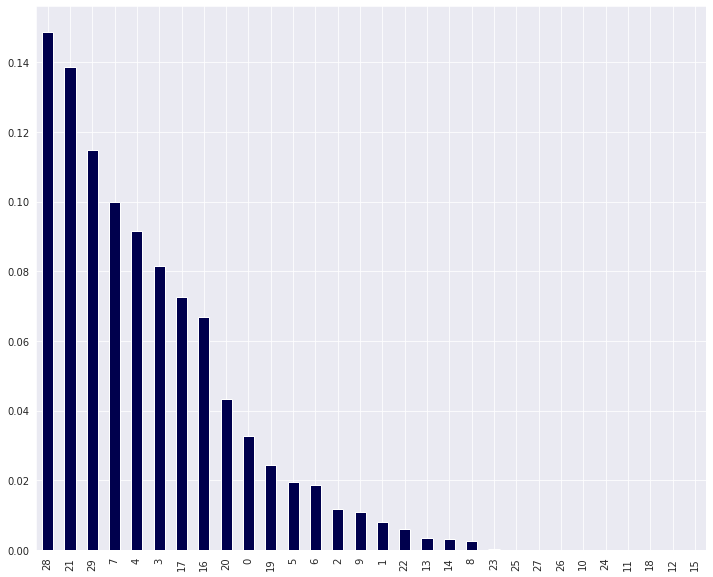

In [48]:
feature_imp(X, rf).plot(kind='bar', figsize=(12,10), legend=False, colormap = 'seismic')